In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime

# set default figure size
plt.rcParams["figure.figsize"] = (8, 5)

In [2]:
pd.options.display.max_columns = None

In [3]:
# Import data
df = pd.read_csv('data/Kickstarter_preprocessed.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209222 entries, 0 to 209221
Data columns (total 76 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         209222 non-null  int64  
 1   backers_count                      209222 non-null  int64  
 2   blurb                              209214 non-null  object 
 3   converted_pledged_amount           209222 non-null  int64  
 4   country                            209222 non-null  object 
 5   created_at                         209222 non-null  int64  
 6   currency                           209222 non-null  object 
 7   currency_symbol                    209222 non-null  object 
 8   currency_trailing_code             209222 non-null  bool   
 9   current_currency                   209222 non-null  object 
 10  deadline                           209222 non-null  int64  
 11  disable_communication              2092

In [5]:
# delete first column
df.drop(['Unnamed: 0'],axis=1,inplace=True);

In [6]:
# rename some columns
df.rename(columns={'name_category':'category_sub','slug_category':'category'},inplace=True)

In [7]:
# split text in column category, keep only left part of string
df.category = df.category.apply(lambda x: x.split('/')[0])

In [8]:
# change string in column category_sub to lower case string
df.category_sub = df.category_sub.str.lower()

In [9]:
# convert description (blurp) into integer --> number of words
df.blurb = df['blurb'].apply(lambda x: len(str(x).split()));
df.rename(columns={'blurb':'description'},inplace=True)

In [10]:
# calculate usd_goal
df['usd_goal'] = df.goal * df.static_usd_rate

In [11]:
df.head()

,backers_count,description,converted_pledged_amount,country,created_at,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,friends,fx_rate,goal,id,is_backing,is_starrable,is_starred,launched_at,name,permissions,photo,pledged,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type,id_category,category_sub,category,position,parent_id,color,urls_category,id_creator,name_creator,is_registered,chosen_currency,avatar,urls_creator,slug_creator,id_location,name_location,slug_location,short_name,displayable_name,localized_name,country_location,state_location,type,is_root,urls_location,id_profile,project_id,state_profile,state_changed_at_profile,name_profile,blurb_profile,background_color,text_color,link_background_color,link_text_color,link_text,link_url,show_feature_image,background_image_opacity,should_show_feature_image_section,feature_image_attributes,background_image_attributes,usd_goal
0,1,20,1,US,1430275012,USD,$,True,USD,1435539798,False,NaN,1.0,5000.0,1170229538,NaN,False,NaN,1430355798,Dragon Crescent LARP,NaN,"{""key"":""assets/012/122/526/6f37b83b305ef9f9f8c...",1.00,dragon-crescent-larp,https://www.kickstarter.com/discover/categorie...,False,False,failed,1435539802,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",1.00,international,271,live games,games,2,12.0,51627,{'discover': 'http://www.kickstarter.com/disco...,60405545.0,Kimberly Ann Edwards,NaN,NaN,https://ksr-ugc.imgix.net/assets/009/841/940/0...,NaN,NaN,2393259.0,Douglas,douglas-ga,"Douglas, GA","Douglas, GA",Douglas,US,GA,Town,0.0,{'nearby_projects': 'https://api.kickstarter.c...,1869415.0,1869415.0,inactive,1.430275e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.8,1.0,{'default': 'https://ksr-ugc.imgix.net/assets/...,NaN,5000.0
1,18,15,1571,US,1406957966,USD,$,True,USD,1410746403,False,NaN,1.0,6000.0,1600951892,NaN,False,NaN,1408154403,The Crossing Shore,NaN,"{""key"":""assets/011/817/792/90f6e5620a56af8890a...",1571.55,the-crossing-shore,https://www.kickstarter.com/discover/categorie...,False,False,failed,1410746410,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",1571.55,international,293,drama,film & video,5,11.0,16734574,{'discover': 'http://www.kickstarter.com/disco...,60405545.0,Kimberly Ann Edwards,NaN,NaN,https://ksr-ugc.imgix.net/assets/009/841/940/0...,NaN,NaN,2393259.0,Douglas,douglas-ga,"Douglas, GA","Douglas, GA",Douglas,US,GA,Town,0.0,{'discover': 'https://www.kickstarter.com/disc...,1251552.0,1251552.0,inactive,1.425916e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.8,1.0,{'default': 'https://ksr-ugc.imgix.net/assets/...,NaN,6000.0
2,2,19,2,US,1405979448,USD,$,True,USD,1408811134,False,NaN,1.0,10000.0,682572349,NaN,False,NaN,1406219134,Like in my dreams...,NaN,"{""key"":""assets/011/798/338/ebe206a1cea5ae9077d...",2.00,like-in-my-dreams,https://www.kickstarter.com/discover/categorie...,False,False,failed,1408811134,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",2.00,domestic,294,experimental,film & video,6,11.0,16734574,{'discover': 'http://www.kickstarter.com/disco...,60405545.0,Kimberly Ann Edwards,NaN,NaN,https://ksr-ugc.imgix.net/assets/009/841/940/0...,NaN,NaN,2487956.0,San Francisco,san-francisco-ca,"San Francisco, CA","San Francisco, CA",San Francisco,US,CA,Town,0.0,{'nearby_projects': 'https://api.kickstarter.c...,1211428.0,1211428.0,inactive,1.425916e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.8,1.0,{'default': 'https://ksr-ugc.imgix.net/assets/...,NaN,10000.0
3,0,25,0,US,1464120865,USD,$,True,USD,1466713581,False,NaN,1.0,8000.0,323976714,NaN,False,NaN,1464121581,Country For Old Men,NaN,"{""key"":""assets/012/504/827/6276617a2091afefb21...",0.00,country-for-old-men,https://www.kickstarter.com/discover/categorie...,False,False,failed,1466713581,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",0.00,domestic,13,journalism,journalism,10,NaN,1228010,{'discover': 'http://www.kickstarter.com/disco...,60405545.0,Kimberly A

## Change unixtime into human readible time

In [12]:
# create function for format change
# we could also use lambda x: datetime.utcfromtimestamp(x)

def chg_date(x):
    return datetime.utcfromtimestamp(x)

In [13]:
# apply on dataframe

time_col = ['created_at','deadline','launched_at']
df[time_col] = df[time_col].applymap(chg_date)

In [14]:
# create new feature called duration
df['duration'] = df.deadline - df.launched_at

In [15]:
# create new feature --> month
df['launched_month'] = df.launched_at.dt.month

## Show target, count classes

Let's take a look on our target.

In [16]:
df.state.value_counts()

successful    117465
failed         75199
canceled        8624
live            7311
suspended        623
Name: state, dtype: int64

We have found four different categories:
- successful
- failed
- live
- suspended

We are restricting the analysis on projects which have been finished, therefore we delete all rows of the categories **canceled**, **live** and **suspended**.

In [17]:
df = df[df.state.isin(['successful','failed'])]

In [18]:
df.state.value_counts()

successful    117465
failed         75199
Name: state, dtype: int64

## Target & Features

In [19]:
# define target
target = ['state']

In [20]:
# define features
features = ['description','category','category_sub',\
            'duration','currency','usd_goal','country',\
            'type','staff_pick','launched_month']

In [21]:
df[features].head()

,description,category,category_sub,duration,currency,usd_goal,country,type,staff_pick,launched_month
0,20,games,live games,60 days,USD,5000.0,US,Town,False,4
1,15,film & video,drama,30 days,USD,6000.0,US,Town,False,8
2,19,film & video,experimental,30 days,USD,10000.0,US,Town,False,7
3,25,journalism,journalism,30 days,USD,8000.0,US,Town,False,5
4,11,games,mobile games,30 days,USD,2000.0,US,Town,False,9


In [22]:
df[features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192664 entries, 0 to 209221
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype          
---  ------          --------------   -----          
 0   description     192664 non-null  int64          
 1   category        192664 non-null  object         
 2   category_sub    192664 non-null  object         
 3   duration        192664 non-null  timedelta64[ns]
 4   currency        192664 non-null  object         
 5   usd_goal        192664 non-null  float64        
 6   country         192664 non-null  object         
 7   type            192565 non-null  object         
 8   staff_pick      192664 non-null  bool           
 9   launched_month  192664 non-null  int64          
dtypes: bool(1), float64(1), int64(2), object(5), timedelta64[ns](1)
memory usage: 14.9+ MB


In [23]:
# convert all features into categories
df = df.astype({name:'category' for name in features})

In [24]:
# convert blurb into int, usd_goal into float
df.usd_goal = df.usd_goal.astype(float)
df.description = df.description.astype(int)

In [25]:
df[features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192664 entries, 0 to 209221
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   description     192664 non-null  int64   
 1   category        192664 non-null  category
 2   category_sub    192664 non-null  category
 3   duration        192664 non-null  category
 4   currency        192664 non-null  category
 5   usd_goal        192664 non-null  float64 
 6   country         192664 non-null  category
 7   type            192565 non-null  category
 8   staff_pick      192664 non-null  category
 9   launched_month  192664 non-null  category
dtypes: category(8), float64(1), int64(1)
memory usage: 8.0 MB


In [26]:
#df[features].localized_name.value_counts()

In [27]:
# convert categorical features into integer classes
cat = ['category','category_sub','duration','currency','country','type','staff_pick','launched_month']
df[cat] = df[cat].apply(lambda x: x.cat.codes);

In [28]:
df[features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192664 entries, 0 to 209221
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   description     192664 non-null  int64  
 1   category        192664 non-null  int8   
 2   category_sub    192664 non-null  int16  
 3   duration        192664 non-null  int32  
 4   currency        192664 non-null  int8   
 5   usd_goal        192664 non-null  float64
 6   country         192664 non-null  int8   
 7   type            192664 non-null  int8   
 8   staff_pick      192664 non-null  int8   
 9   launched_month  192664 non-null  int8   
dtypes: float64(1), int16(1), int32(1), int64(1), int8(6)
memory usage: 6.6 MB


In [29]:
# calculate the correlation matrix 
feat = df[features]
corr = feat.corr()

In [30]:
feat.head()

,description,category,category_sub,duration,currency,usd_goal,country,type,staff_pick,launched_month
0,20,8,84,47445,13,5000.0,21,7,0,3
1,15,6,40,21975,13,6000.0,21,7,0,7
2,19,6,45,21975,13,10000.0,21,7,0,6
3,25,9,77,21975,13,8000.0,21,7,0,4
4,11,8,88,21975,13,2000.0,21,7,0,8


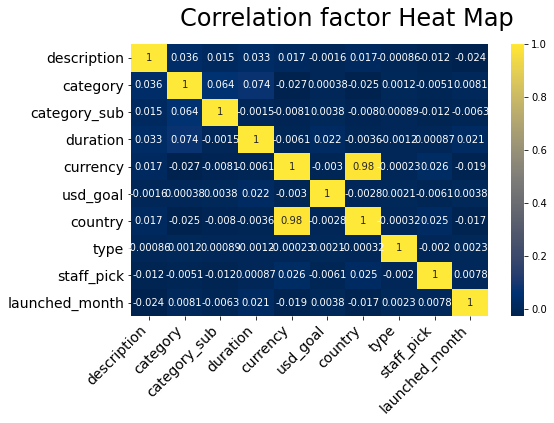

In [31]:
# plot heatmap

fig, ax = plt.subplots()
sns.heatmap(corr, xticklabels=feat.columns, yticklabels=feat.columns, annot=True,cmap='cividis')

fig.text(s="Correlation factor Heat Map",x=.5,y=0.95, fontsize = 24,ha='center', va='center')
plt.xticks(rotation=45, fontsize=14, ha='right')
plt.yticks(rotation=0, fontsize=14);

Due to the high correlation between country and currency, we decided not to use currency as a feature

In [32]:
features.pop(features.index('currency'));

## Train test split

In [33]:
# import
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, plot_roc_curve

In [34]:
X = df[features]
y = df[target]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set: ', X_test.shape , y_test.shape)

Train set: (144498, 9) (144498, 1)
Test set:  (48166, 9) (48166, 1)


## Set up Random forrest classifier

Import necesarry modules 

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

Create Random forrest object and fit with train values. `values.ravel()` transforms the y_train into 1D array

In [37]:
rfc = RandomForestClassifier(max_depth=20, max_features=0.5, min_samples_split=5, n_jobs=-1)
rfc.fit(X_train,y_train.values.ravel());

Predict the target values for the test data

In [38]:
y_pred = rfc.predict(X_test)

Predict the target values for the train data

In [39]:
y_pred_train = rfc.predict(X_train)

### Print the classifictaion report and the confusion matrix on the test data

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      failed       0.78      0.70      0.74     18800
  successful       0.82      0.87      0.84     29366

    accuracy                           0.80     48166
   macro avg       0.80      0.78      0.79     48166
weighted avg       0.80      0.80      0.80     48166



### Print the classifictaion report and the confusion matrixn the training data

In [41]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

      failed       0.92      0.86      0.89     56399
  successful       0.91      0.95      0.93     88099

    accuracy                           0.92    144498
   macro avg       0.92      0.91      0.91    144498
weighted avg       0.92      0.92      0.92    144498



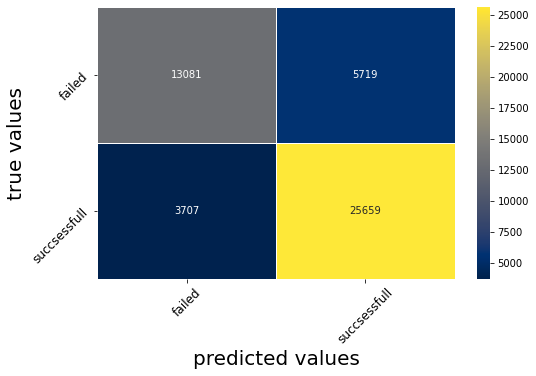

In [42]:
# create confusion matrix
cm = confusion_matrix(y_test,y_pred)

# define figure size
fig, ax = plt.subplots()

# plot heatmap
sns.heatmap(cm, cmap='cividis',ax=ax, annot=True, fmt='d', linewidths=.5)

# adjust figure
ax.set_xticklabels(['failed','succsessfull'])
ax.set_yticklabels(['failed','succsessfull'])
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=45, fontsize=12)
plt.xlabel('predicted values',fontsize=20)
plt.ylabel('true values',fontsize=20);

### Take a look on feature importance

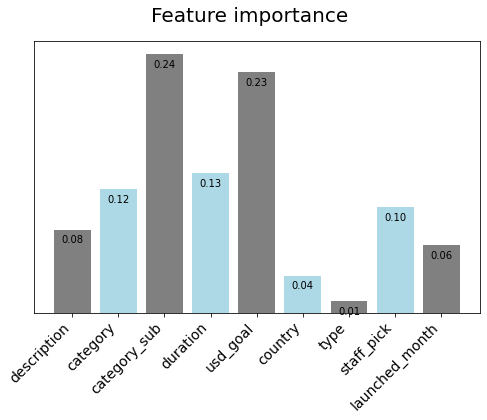

In [43]:
# calculate importance
importance = rfc.feature_importances_

# set axis, create figure
x_axis = list(range(len(importance)))
fig, ax = plt.subplots()

# plot figure
plt.bar(x_axis, importance, color=['grey','lightblue'])

# add Title
fig.text(s="Feature importance",x=.5,y=0.95, fontsize = 20,ha='center', va='center')

# edit xticks
plt.xticks(x_axis, features, rotation=45, fontsize=14, ha='right')
#plt.yticks(rotation=0, fontsize=14);
plt.yticks([])
# add value inside the bars
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, -10), textcoords='offset points')

### Plot ROC curve

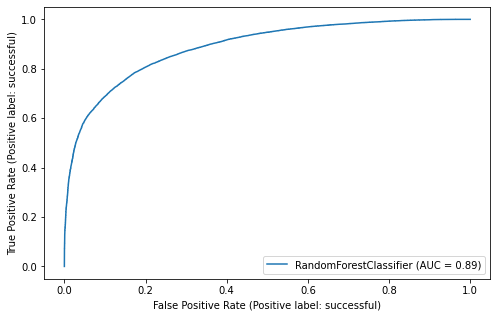

In [44]:
plot_roc_curve(rfc, X_test, y_test);

### Grid search fo the Random tree forrest

In [45]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [46]:
rfc.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [47]:
# set random seed
RSEED = 42

# Hyperparameter grid
param_grid = {
    #'n_estimators': [100, 150, 250, 300],
    'max_depth': [None] +  [5,20,50],
    'max_features': ['sqrt', None, 0.5],
    #'max_leaf_nodes': [None] + [10, 50, 200],
    'min_samples_split': [5, 10],
    #'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = RSEED)

# Create the random search model
rs = GridSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'roc_auc', cv = 3, 
                        verbose = 5)

# Fit 
rs.fit(X_train, y_train.values.ravel())

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 20, 50],
                         'max_features': ['sqrt', None, 0.5],
                         'min_samples_split': [5, 10]},
             scoring='roc_auc', verbose=5)

### What are the best parameters found during the Gridsearch

In [48]:
rs.best_params_

{'max_depth': 50, 'max_features': 0.5, 'min_samples_split': 5}

### Save the best model into variable

In [49]:
opt_model = rs.best_estimator_

In [50]:
y_pred_opt = opt_model.predict(X_test)

### Compare base model and optimized model, state nodes and maximum depth

In [51]:
n_nodes=[]
max_depths=[]
for ind_tree in rfc.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 18539
Average maximum depth 20


In [52]:
n_nodes=[]
max_depths=[]
for ind_tree in opt_model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 35530
Average maximum depth 42


### Plot ROC curve

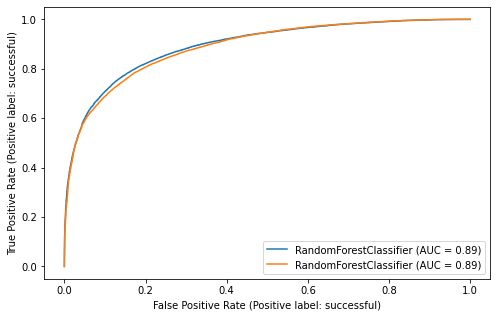

In [53]:
ax = plt.gca()
plot_roc_curve(opt_model, X_test, y_test,ax=ax)
plot_roc_curve(rfc, X_test, y_test,ax=ax)


---

## Setup KNN classifier

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train.values.ravel());

In [56]:
y_pred = knn.predict(X_test)

Print the classifictaion report and the confusin matrix

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      failed       0.59      0.49      0.53     18800
  successful       0.70      0.78      0.74     29366

    accuracy                           0.66     48166
   macro avg       0.64      0.63      0.63     48166
weighted avg       0.66      0.66      0.66     48166



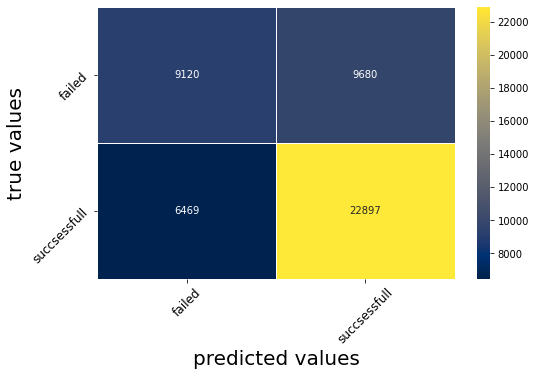

In [58]:
# create confusion matrix
cm = confusion_matrix(y_test,y_pred)

# define figure size
fig, ax = plt.subplots()

# plot heatmap
sns.heatmap(cm, cmap='cividis',ax=ax, annot=True, fmt='d', linewidths=.5)

# adjust figure
ax.set_xticklabels(['failed','succsessfull'])
ax.set_yticklabels(['failed','succsessfull'])
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=45, fontsize=12)
plt.xlabel('predicted values',fontsize=20)
plt.ylabel('true values',fontsize=20);

## Setup Dummy classifier

In [59]:
# import
from sklearn.dummy import DummyClassifier

### Strategy: stratified

In [60]:
model = DummyClassifier(strategy='stratified')
model.fit(X_train,y_train.values.ravel())
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      failed       0.39      0.39      0.39     18800
  successful       0.61      0.61      0.61     29366

    accuracy                           0.53     48166
   macro avg       0.50      0.50      0.50     48166
weighted avg       0.53      0.53      0.53     48166



### Strategy: uniform

In [61]:
model = DummyClassifier(strategy='uniform')
model.fit(X_train,y_train.values.ravel())
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      failed       0.39      0.50      0.44     18800
  successful       0.61      0.50      0.55     29366

    accuracy                           0.50     48166
   macro avg       0.50      0.50      0.49     48166
weighted avg       0.52      0.50      0.50     48166



Print the classifictaion report and the confusin matrix